# subplots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV 

%matplotlib inline
plt.rc('font',family='Malgun Gothic')
warnings.filterwarnings('ignore')

In [2]:
bike_df = pd.read_csv('C:/Users/Park/_Python_data/bike_train.csv')

bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.drop(['datetime','casual','registered'],axis=1,inplace=True)

X = bike_df.drop(['count'], axis=1)
y= bike_df['count']

[Text(0.5, 1.0, 'log1p'), Text(0.5, 0, 'count'), Text(0, 0.5, 'density')]

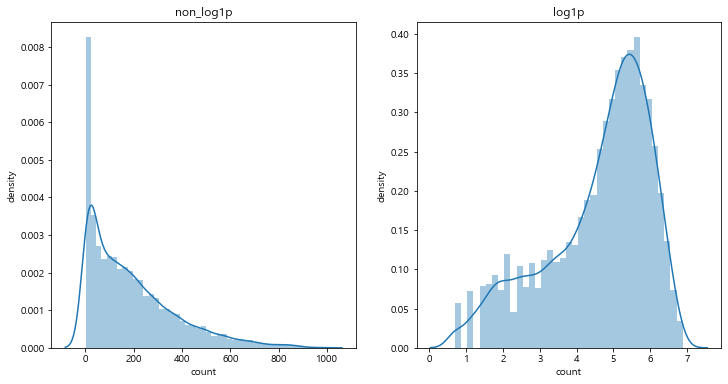

In [3]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
ax1 = axes[0]
ax2 = axes[1]

sns.distplot(y, ax=ax1)
sns.distplot(np.log1p(y), ax=ax2)
ax1.set(title = 'non_log1p', xlabel = 'count', ylabel='density')
ax2.set(title = 'log1p', xlabel = 'count', ylabel='density')


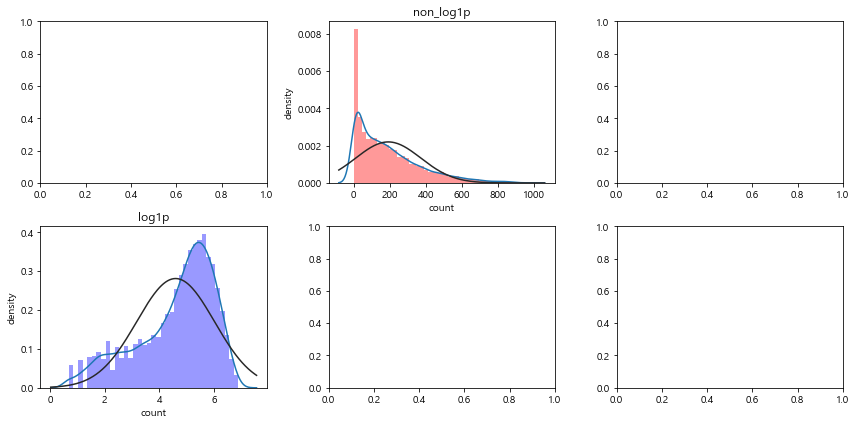

In [4]:
fig, axes = plt.subplots(2,3,figsize=(12,6))
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[0,2]
ax4 = axes[1,0]
ax5 = axes[1,1]
ax6 = axes[1,2]

sns.distplot(y, ax=ax2,fit=stats.norm, hist_kws={'color':'r'})
sns.distplot(np.log1p(y),ax=ax4, fit=stats.norm, hist_kws={'color' : 'b'})
ax2.set(title = 'non_log1p', xlabel = 'count', ylabel='density')
ax4.set(title = 'log1p', xlabel = 'count', ylabel='density')

plt.tight_layout()

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

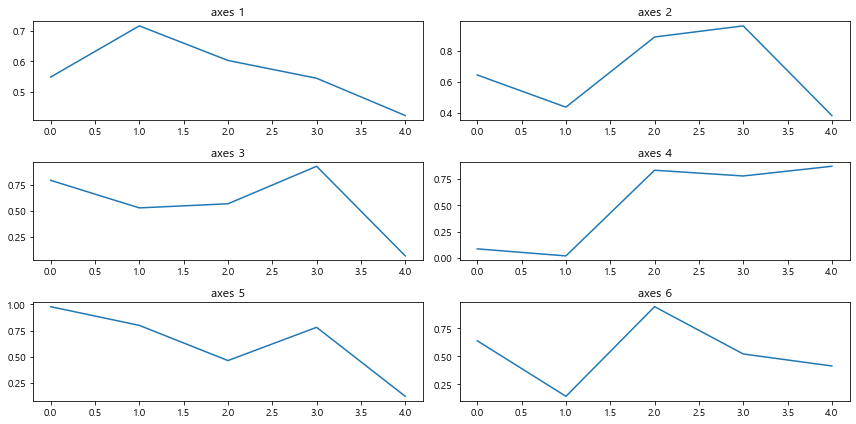

In [5]:
fig, axes = plt.subplots(3, 2,figsize=(12,6))

np.random.seed(0)
axes[0, 0].plot(np.random.rand(5))
axes[0, 0].set_title("axes 1")
axes[0, 1].plot(np.random.rand(5))
axes[0, 1].set_title("axes 2")
axes[1, 0].plot(np.random.rand(5))
axes[1, 0].set_title("axes 3")
axes[1, 1].plot(np.random.rand(5))
axes[1, 1].set_title("axes 4")
axes[2, 0].plot(np.random.rand(5))
axes[2, 0].set_title("axes 5")
axes[2, 1].plot(np.random.rand(5))
axes[2, 1].set_title("axes 6")

plt.tight_layout()
plt.show()

In [28]:
df = pd.read_csv('C:/Users/Park/_Python_data/salesanalysis/all_data.csv')
df = df.dropna(axis=0)
drop_or = df[df.loc[:,'Order Date'].str.contains('Or')].index
df = df.drop(index = drop_or,axis=0)
df['OrderMonth'] = df['Order Date'].str[0:2].astype('int')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
result_product = df.groupby('Product').sum().reset_index()

prices = df.groupby('Product').sum()['Price Each'].reset_index()

<AxesSubplot:title={'center':'Product'}, xlabel='Product', ylabel='Price Each'>

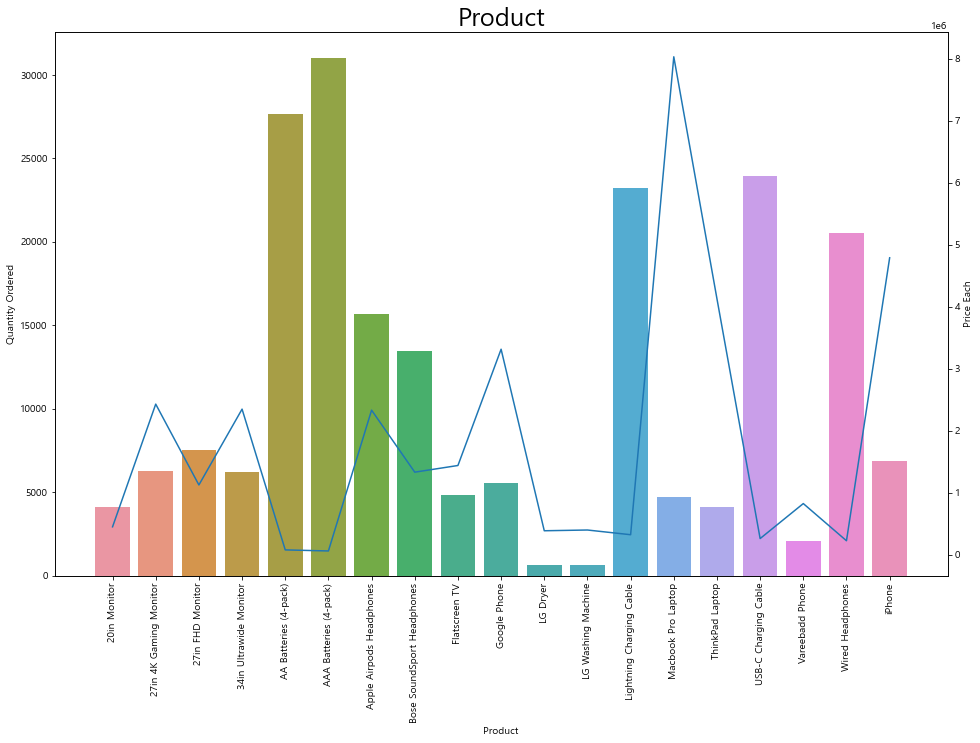

In [29]:
fig, ax1 = plt.subplots(1,figsize=(16,10))
ax2 = ax1.twinx()

plt.title('Product',fontsize=25)
ax1.set_xticklabels(result_product['Quantity Ordered'], rotation = 90)  # 변수 이름 로테이션
sns.barplot(result_product.Product, result_product['Quantity Ordered'],ax=ax1)
sns.lineplot(prices.Product, prices['Price Each'], ax= ax2)

# 반복문을 통한 subplots 생성

In [22]:
from sklearn.datasets import load_boston

boston=load_boston()
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price']=boston.target
print('boston data shape :', df.shape)
df.head()

boston data shape : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


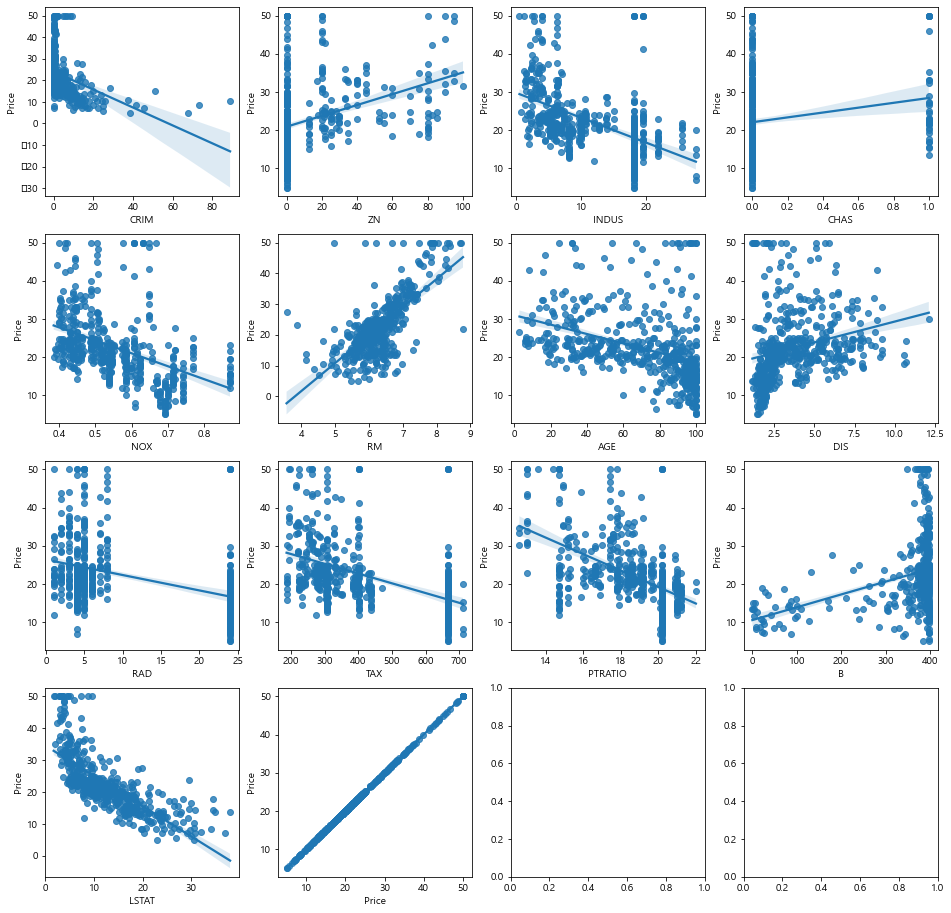

In [23]:
fig, axes = plt.subplots(4,4, figsize=(16,16))
lm_features = df.columns

for i, features in enumerate(lm_features):   # enumerate() 함수를 사용하면 컬럼명을 함께 출력할 수 있다.
    row = int(i/4)
    col = i%4
    sns.regplot(features, 'Price', data=df, ax=axes[row][col])